In [34]:
import time
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [18]:
# References
# https://www.kaggle.com/soujanyag/good-bad-connections-network-intrusion-tf
# https://www.kaggle.com/abhaymudgal/intrusion-detection-system-accuracy-99-9

In [ ]:
# We have 

In [8]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [9]:
df = pd.read_csv("./data/kdd_complete.csv",header=None, names = col_names)

In [10]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [22]:
df['label'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label, dtype: int64

In [28]:
attack_types = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/training_attack_types'
types = requests.get(attack_types)
attack_dict = {}
types_text_split = types.text.split()
for idx in range(0, len(types_text_split)):
    if idx < len(types_text_split) -1:
        attack_dict[types_text_split[idx]] = types_text_split[idx+1]
attack_dict['normal'] = 'normal'

In [27]:
df['label'] = df.label.apply(lambda x : attack_dict[x[0:-1]] )
df.label.value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: label, dtype: int64

In [31]:
df = df.dropna('columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more th

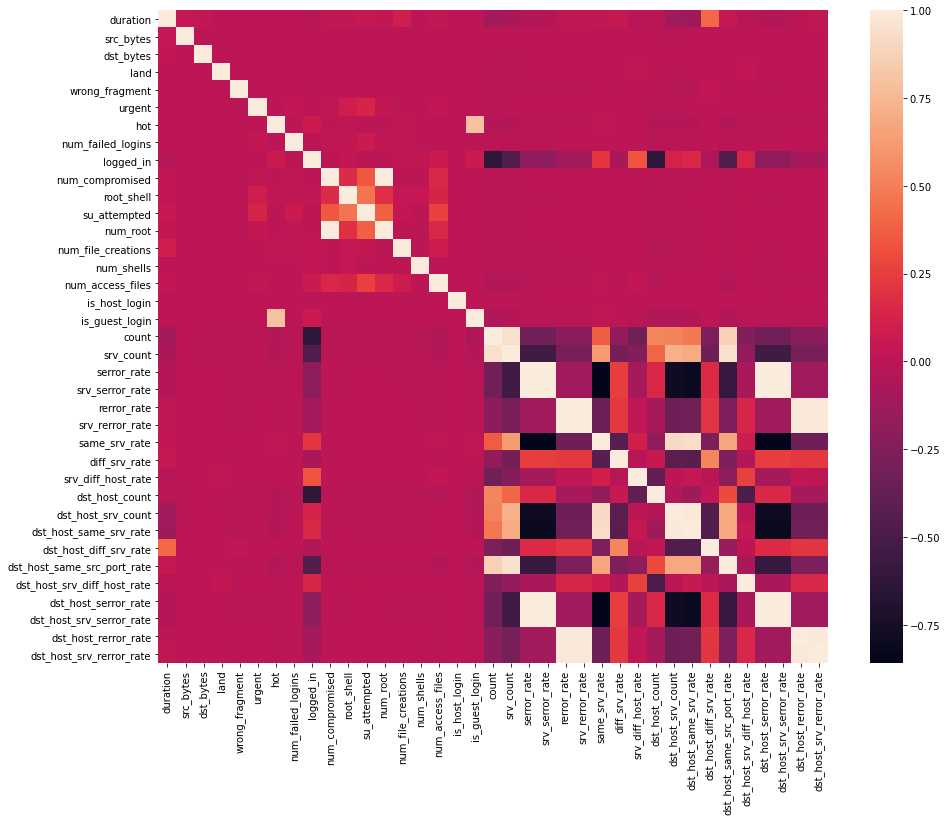

In [35]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [36]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [37]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)
df.drop('service',axis = 1,inplace= True)


In [44]:
# Identifying categorical features
numeric_cols = df._get_numeric_data().columns # gets all the numeric column names
categorical_cols = list(set(df.columns)-set(numeric_cols))
binary_cols = []
for col in numeric_cols:
    if len(df[col].unique()) <= 2:
        result = []
        s = df[col].value_counts()
        t = float(len(df[col]))
        for v in s.index:
            result.append("{}({}%)".format(v,round(100*(s[v]/t),1)))
        print("{} - [{}]".format(col, " , ".join(result)))
        binary_cols.append(col)
# combine all categorical column names
for col in binary_cols:
    categorical_cols.append(col)
categorical_cols

land - [0(100.0%) , 1(0.0%)]
logged_in - [0(85.6%) , 1(14.4%)]
root_shell - [0(100.0%) , 1(0.0%)]
is_host_login - [0(100.0%) , 1(0.0%)]
is_guest_login - [0(99.9%) , 1(0.1%)]


['label', 'land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']

In [45]:
# identify remaining numeric features by subtracting categorical columns
numeric_features = list(set(numeric_cols)-set(categorical_cols))
def apply_zscore(feature):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature] = (df[feature] - mean) / std
for feature in numeric_features:
    apply_zscore(feature)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [46]:
Y = df['label']
X = df.drop(['label',], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3281948, 31) (1616483, 31)
(3281948,) (1616483,)


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model3 = RandomForestClassifier(n_estimators=30)

In [49]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [50]:
Y_test_pred3 = model3.predict(X_test)

In [51]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999643504406529
Test score is: 0.9998632834369431
